In [6]:
%matplotlib inline

from math import atan2, pi
from random import randint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform

from neighborjoining.neighbor_joining import (run_neighbor_joining, make_rooted,
                                              get_points_radial, get_points_circular, get_children)

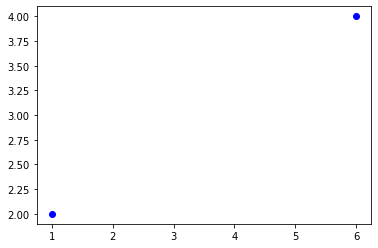

In [14]:
plt.plot((1,6),(2,4),'bo')
plt.show()

In [19]:
def plot(tree, points, labels=[], classes=None):
    for v1 in tree:
        for v2 in get_children(tree, v1):
            plt.plot((points[v1][0], points[v2][0]), (points[v1][1], points[v2][1]), 'k')
            if v2 < len(labels):
                delta = points[v2] - points[v1]
                angle = atan2(delta[1], delta[0])*180/pi
                angle = (angle + 360) % 360
                if angle > 90 and angle < 270:
                    alignment = "right"
                else:
                    alignment = "left"
                if angle < 90:
                    pass
                elif angle < 180:
                    pass
                elif angle < 270:
                    pass
                else:
                    pass
                if angle < 45:
                    va = "center"
                elif angle < 135:
                    va = "bottom"
                elif angle < 225:
                    va = "center"
                elif angle < 315:
                    va = "top"
                else:
                    va = "center"

                if angle > 90 and angle < 270:
                    rotation = (angle + 180) % 360
                else:
                    rotation = angle
                plt.text(*points[v2], labels[v2], rotation=rotation,
                         va=va, clip_on=True, ha=alignment)

    if classes != None:
        for c in classes:
            plt.plot([points[x][0] for x in c], [points[x][1] for x in c], ".", ms=3)

    # plt.savefig("output.svg")
    plt.show()

In [3]:
d = np.array([[0, 5, 9, 9, 8],
              [5, 0, 10, 10, 9],
              [9, 10, 0, 8, 7],
              [9, 10, 8, 0, 3],
              [8, 9, 7, 3, 0]])
tree = run_neighbor_joining(d)
tree

{1: [[5, 3.0]],
 0: [[5, 2.0]],
 5: [[1, 3.0], [0, 2.0], [6, 3.0]],
 2: [[6, 4.0]],
 6: [[5, 3.0], [2, 4.0], [7, 2.0]],
 4: [[7, 1.0]],
 3: [[7, 2.0]],
 7: [[4, 1.0], [3, 2.0], [6, 2.0]]}

In [4]:
tree = make_rooted(tree)
tree

{1: [],
 0: [[5, 2.0]],
 5: [[1, 3.0], [6, 3.0]],
 2: [],
 6: [[2, 4.0], [7, 2.0]],
 4: [],
 3: [],
 7: [[4, 1.0], [3, 2.0]]}

In [17]:
points = get_points_radial(tree)
points


{0: array([0, 0]),
 5: array([-2.0000000e+00,  2.4492936e-16]),
 1: array([0.12132034, 2.12132034]),
 6: array([-4.12132034, -2.12132034]),
 2: array([-6.94974747,  0.70710678]),
 7: array([-4.12132034, -4.12132034]),
 4: array([-4.82842712, -4.82842712]),
 3: array([-2.70710678, -5.53553391])}

In [21]:
points_1 = {1000:[0, 0], 1001: [1.2246468e-16, 2.0000000e+00], 1002: [0.5, 2.8660254],1:[3.96410162, 4.8660254 ], 0:[0.5, 3.8660254], 2:[-1.73205081,  3.], 1003:[-0.5, -0.8660254],4:[-2.23205081, -1.8660254 ], 3:[-0.5, -3.8660254], 5:[ 4.33012702, -2.5]}


In [22]:
points_1

{1000: [0, 0],
 1001: [1.2246468e-16, 2.0],
 1002: [0.5, 2.8660254],
 1: [3.96410162, 4.8660254],
 0: [0.5, 3.8660254],
 2: [-1.73205081, 3.0],
 1003: [-0.5, -0.8660254],
 4: [-2.23205081, -1.8660254],
 3: [-0.5, -3.8660254],
 5: [4.33012702, -2.5]}

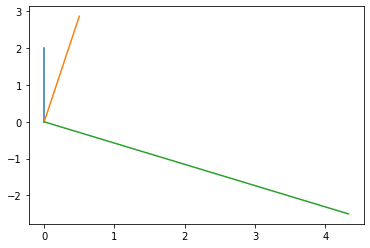

In [25]:
plt.plot((0,1.2246468e-16),(0,2.0))
plt.plot((0,0.5),(0,2.8660254))
plt.plot((0,4.33),(0,-2.5))
plt.show()

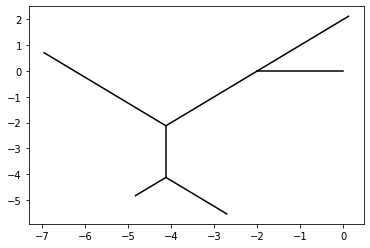

In [20]:
plot(tree, points)

In [15]:
from ete3 import ClusterTree,TreeStyle